In [1]:
import pandas as pd
import numpy as np

import os, datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("data/stock_data.csv")
df.head()

,High,Low,Open,Close,Volume,Adj Close,Ticker
0,149.729996,148.490005,149.360001,148.850006,56094900.0,148.443954,AAPL
1,153.169998,149.720001,149.820007,152.570007,100077900.0,152.153809,AAPL
2,149.940002,146.410004,147.220001,149.800003,124953200.0,149.391357,AAPL
3,149.699997,147.800003,148.990005,148.960007,74588300.0,148.553650,AAPL
4,151.570007,148.649994,148.660004,150.020004,69122000.0,149.610764,AAPL


In [3]:
df1=df.reset_index()['Close']
df1

0     148.850006
1     152.570007
2     149.800003
3     148.960007
4     150.020004
         ...    
95    155.089996
96    159.589996
97    160.619995
98    163.979996
99    165.380005
Name: Close, Length: 100, dtype: float64

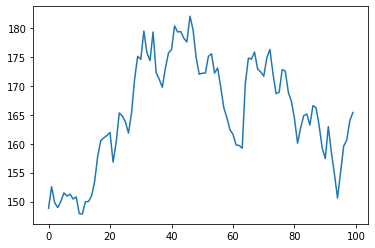

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(len(df1))

100


In [6]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(65, 35)

In [7]:
train_data

array([[0.02870565],
       [0.13766878],
       [0.05653216],
       [0.0319277 ],
       [0.06297625],
       [0.10603428],
       [0.09051001],
       [0.09988294],
       [0.07527848],
       [0.08611607],
       [0.00146465],
       [0.        ],
       [0.06209755],
       [0.0623903 ],
       [0.09168146],
       [0.16461659],
       [0.29291155],
       [0.37141207],
       [0.38517895],
       [0.39660248],
       [0.41212676],
       [0.26186299],
       [0.36233189],
       [0.51054506],
       [0.49502078],
       [0.46543643],
       [0.40919747],
       [0.51113101],
       [0.68277674],
       [0.79701251],
       [0.78178099],
       [0.92501472],
       [0.81634478],
       [0.77504415],
       [0.92062122],
       [0.71441124],
       [0.68160529],
       [0.64089061],
       [0.73579411],
       [0.81341549],
       [0.83216181],
       [0.95079107],
       [0.92032802],
       [0.92296457],
       [0.88840077],
       [0.86994765],
       [1.        ],
       [0.932

In [8]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(54, 10)
(54,)
(24, 10)
(24,)


(None, None)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=10,verbose=1)

Epoch 1/25
6/6 [==============================] - 8s 293ms/step - loss: 0.3389 - val_loss: 0.0642
Epoch 2/25
6/6 [==============================] - 0s 23ms/step - loss: 0.0935 - val_loss: 0.1052
Epoch 3/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0571 - val_loss: 0.0467
Epoch 4/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0374 - val_loss: 0.0208
Epoch 5/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0366 - val_loss: 0.0447
Epoch 6/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0393 - val_loss: 0.0593
Epoch 7/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0331 - val_loss: 0.0260
Epoch 8/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0370 - val_loss: 0.0285
Epoch 9/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0357 - val_loss: 0.0571
Epoch 10/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0349 - val_loss: 0.0354
Epoch 11/25
6/6 [===========

In [14]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [15]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [16]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.35690089669072

In [17]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

168.6667273945685

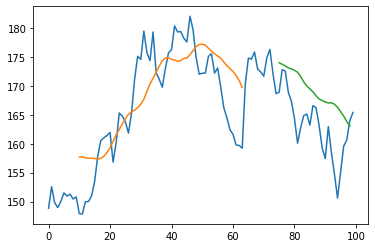

In [50]:
### Plotting
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
len(test_data)

35

In [51]:
x_input=test_data[25:].reshape(1,-1)
x_input.shape

(1, 10)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

10

In [52]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):

    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.4395079  0.45227167 0.45722649 0.47358832 0.49810901 0.52982205
 0.55147475 0.56448799 0.57648695 0.58327836]
0 day output [[0.58899015]]
1 day input [0.45227167 0.45722649 0.47358832 0.49810901 0.52982205 0.55147475
 0.56448799 0.57648695 0.58327836 0.58899015]
1 day output [[0.60075176]]
2 day input [0.45722649 0.47358832 0.49810901 0.52982205 0.55147475 0.56448799
 0.57648695 0.58327836 0.58899015 0.60075176]
2 day output [[0.61218715]]
3 day input [0.47358832 0.49810901 0.52982205 0.55147475 0.56448799 0.57648695
 0.58327836 0.58899015 0.60075176 0.61218715]
3 day output [[0.62366825]]
4 day input [0.49810901 0.52982205 0.55147475 0.56448799 0.57648695 0.58327836
 0.58899015 0.60075176 0.61218715 0.62366825]
4 day output [[0.6343714]]
5 day input [0.52982205 0.55147475 0.56448799 0.57648695 0.58327836 0.58899015
 0.60075176 0.61218715 0.62366825 0.6343714 ]
5 day output [[0.64381707]]
6 day input [0.55147475 0.56448799 0.57648695 0.58327836 0.58899015 0.60075176
 0.6

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [39]:
len(df1)

100

In [49]:
# plt.plot(day_new,scaler.inverse_transform(df1[100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.